In [1]:
from summary import create_summary
import pandas as pd

df, avg, std = create_summary("")

<Axes: >

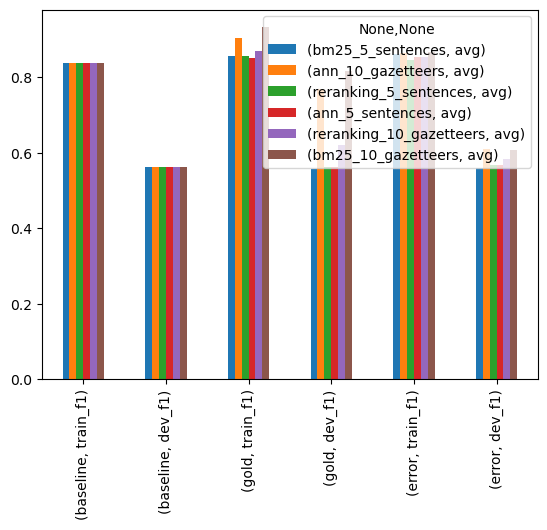

In [3]:
idx = pd.IndexSlice
df.loc[:, idx[:, "avg"]].plot(kind="bar")

In [ ]:
import seaborn as sns

fg = sns.catplot()

In [1]:
import sys
import os

thesis_path = "/" + os.path.join(
    *os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)
thesis_path, os.getcwd()

('/Users/robinloebbert/Masterarbeit/thesis',
 '/Users/robinloebbert/Masterarbeit/thesis/evaluations')

In [2]:
from pipelines.evaluation import factors

denoms = factors(40)

In [6]:
denoms[denoms.index(2)+1]

4

In [3]:
factors(50)

[1, 2, 5, 10, 25, 50]

In [3]:
dataset_files={
                   "train":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_train.json",
                   "dev":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_dev.json",
                   "test":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_test.json",
                   "types":
                   "/Users/robinloebbert/Masterarbeit/thesis/data/wnut/wnut_types.json"
               }

In [8]:
import json
from collections import Counter
def entity_count_file(dataset_file):
    with open(dataset_file, "r", encoding="utf-8") as file:
        dataset = json.load(file)
    entities = []
    for item in dataset:
        for entity in item["entities"]:
            if entity["end"] - entity["start"] == 0:
                entity["end"] +=1
            entities.append((" ".join(item["tokens"][entity["start"]:entity["end"]]) , entity["type"]))
    return Counter(entities)

train_entities = entity_count_file(dataset_files["train"])

In [6]:
dev_entities = entity_count_file(dataset_files["dev"])
test_entities = entity_count_file(dataset_files["test"])

In [54]:
from typing import Iterable

def calc_set_intersection(first: Iterable, second: Iterable):
    return set(first).intersection(set(second))

In [55]:
train_dev_overlap = calc_set_intersection(train_entities, dev_entities)
len(train_dev_overlap)

0

In [56]:
train_test_overlap = calc_set_intersection(train_entities, test_entities)
len(train_test_overlap)

0

In [61]:

dev_test_overlap = calc_set_intersection(dev_entities, test_entities)

def overlap_metrics(first: Counter, second: Counter):
    overlap = calc_set_intersection(first, second)
    total_count = len(overlap)
    if total_count == 0:
        return total_count, 0.0, 0.0
    rel_first = sum([first[item] for item in overlap]) / sum([value for value in first.values()])
    rel_second = sum([second[item] for item in overlap]) / sum([value for value in second.values()])
    return total_count, rel_first, rel_second

(
    overlap_metrics(train_entities, dev_entities),
    overlap_metrics(train_entities, test_entities),
    overlap_metrics(dev_entities, test_entities)
 )

((0, 0.0, 0.0), (0, 0.0, 0.0), (33, 0.061004784688995214, 0.06672845227062095))

In [50]:
import pandas as pd
def plot_entity_count(entity_count: Counter):
    entities_df = pd.DataFrame.from_records([ {"entity": key[0], "type": key[1], "count": count} for key, count in entity_count.items()])
    # indexed_df = entities_df.set_index(["entity", "type"])
    entities_df.sort_values(by=["count"], ascending=False, inplace=True)
    entities_df.reset_index(inplace=True)
    return entities_df, entities_df.plot(y="count", ylabel="Occurances", xlabel="Entities", use_index=True)

<AxesSubplot: xlabel='Entities', ylabel='Occurances'>

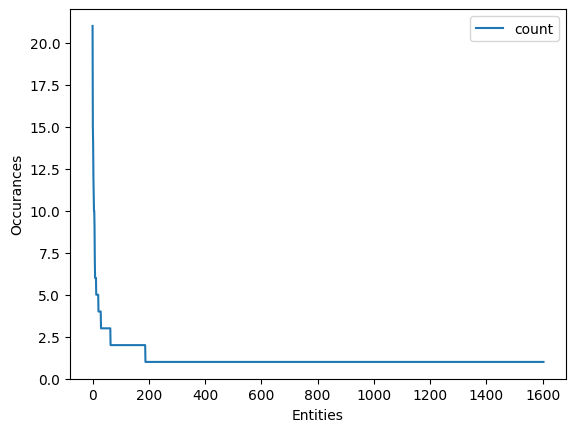

In [51]:
plot_entity_count(train_entities)[1]

<AxesSubplot: xlabel='Entities', ylabel='Occurances'>

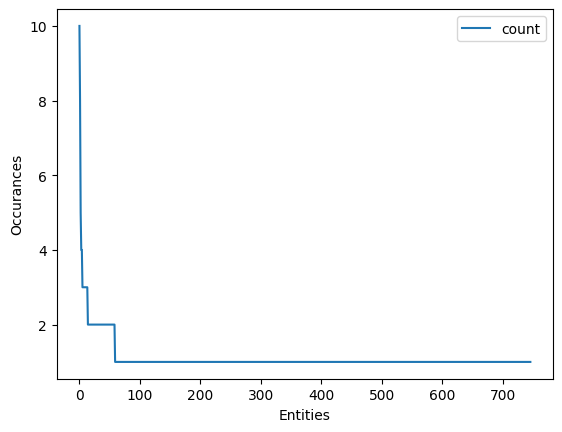

In [52]:
plot_entity_count(dev_entities)[1]

<AxesSubplot: xlabel='Entities', ylabel='Occurances'>

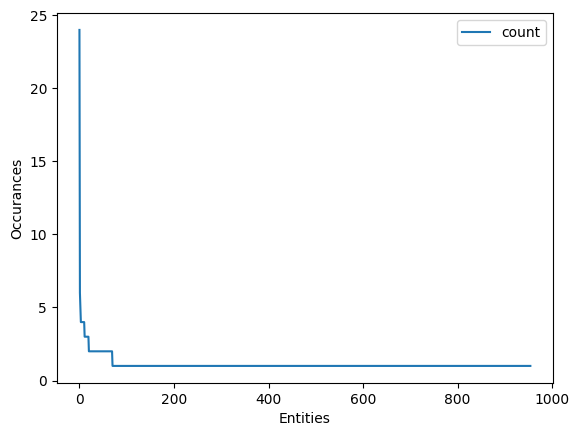

In [53]:
plot_entity_count(test_entities)[1]

In [4]:
from summary import create_database_stats

_, sims = create_database_stats("")

In [104]:
sims

,experiment_name,db_name,dataset_name,entry_name,result_idx,avg,std
0,bm25_10_sentences,gold,train,wnut_train_0,0,0.085733,0.0
1,bm25_10_sentences,gold,train,wnut_train_0,1,0.085733,0.0
2,bm25_10_sentences,gold,train,wnut_train_0,2,0.081378,0.0
3,bm25_10_sentences,gold,train,wnut_train_0,3,0.125783,0.0
4,bm25_10_sentences,gold,train,wnut_train_0,4,0.107386,0.0
...,...,...,...,...,...,...,...
433891,bm25_10_gazetteers,error,test,wnut_test_1270,8,0.132620,0.0
433892,bm25_10_gazetteers,error,test,wnut_test_1272,3,0.114649,0.0
433893,bm25_10_gazetteers,error,test,wnut_test_1272,4,0.141852,0.0
433894,bm25_10_gazetteers,error,test,wnut_test_1277,4,0.096708,0.0


In [5]:
lines = sims[sims["dataset_name"] == "train"].pivot_table(values=["avg"], index="result_idx", columns=["experiment_name", "db_name"], aggfunc="mean")
lines

avg                                      \
experiment_name ann_10_gazetteers           ann_5_sentences             
db_name                     error      gold           error      gold   
result_idx                                                              
0                        0.387661  0.415556        0.547049  0.579021   
1                        0.343784  0.368526        0.499036  0.526460   
2                        0.324008  0.347487        0.478116  0.505425   
3                        0.310714  0.333199        0.464051  0.492330   
4                        0.299747  0.323110        0.452897  0.481839   
5                        0.285967  0.314383             NaN       NaN   
6                        0.273298  0.306004             NaN       NaN   
7                        0.265265  0.294447             NaN       NaN   
8                        0.258782  0.287818             NaN       NaN   
9                        0.253492  0.282260             NaN       NaN   

                                                                         \
experiment_name bm25_10_gazetteers           bm25_5_sentences             
db_name                      error      gold            error      gold   
result_idx                                                                
0                         0.113967  0.118854         0.147160  0.148654   
1                         0.109106  0.114217         0.145406  0.145892   
2                         0.104140  0.108443         0.144469  0.146822   
3                         0.103031  0.106361         0.143656  0.145866   
4                         0.100418  0.103405         0.143268  0.144019   
5                         0.100070  0.102731              NaN       NaN   
6                         0.100150  0.101313              NaN       NaN   
7                         0.099752  0.100255              NaN       NaN   
8                         0.099073  0.100200              NaN       NaN   
9                         0.098319  0.099288              NaN       NaN   

                                                                         \
experiment_name reranking_10_gazetteers           reranking_5_sentences   
db_name                           error      gold                 error   
result_idx                                                                
0                              0.267170  0.288874              0.456028   
1                              0.268906  0.291172              0.459161   
2                              0.270148  0.290961              0.461511   
3                              0.270170  0.289754              0.461248   
4                              0.270055  0.291632              0.459975   
5                              0.270148  0.292394                   NaN   
6                              0.271383  0.293954                   NaN   
7                              0.271301  0.294613                   NaN   
8                              0.271677  0.295268                   NaN   
9                              0.271367  0.296594                   NaN   

                           
experiment_name            
db_name              gold  
result_idx                 
0                0.485357  
1                0.488846  
2                0.490150  
3                0.491508  
4                0.490357  
5                     NaN  
6                     NaN  
7                     NaN  
8                     NaN  
9                     NaN

<Axes: xlabel='result_idx'>

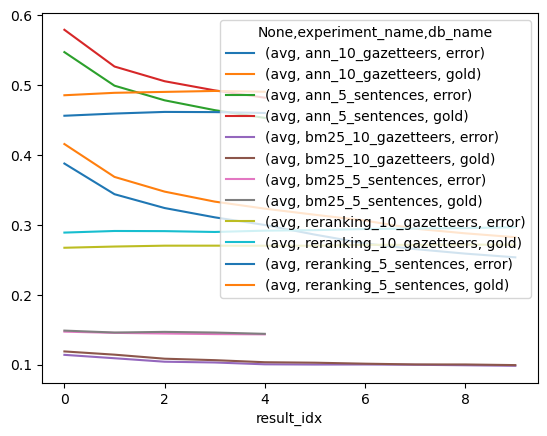

In [6]:
lines.plot.line()

In [8]:
experiments = sims["experiment_name"].unique().tolist()
dbs = sims["db_name"].unique().tolist()
dataset_parts = sims["dataset_name"].unique().tolist()

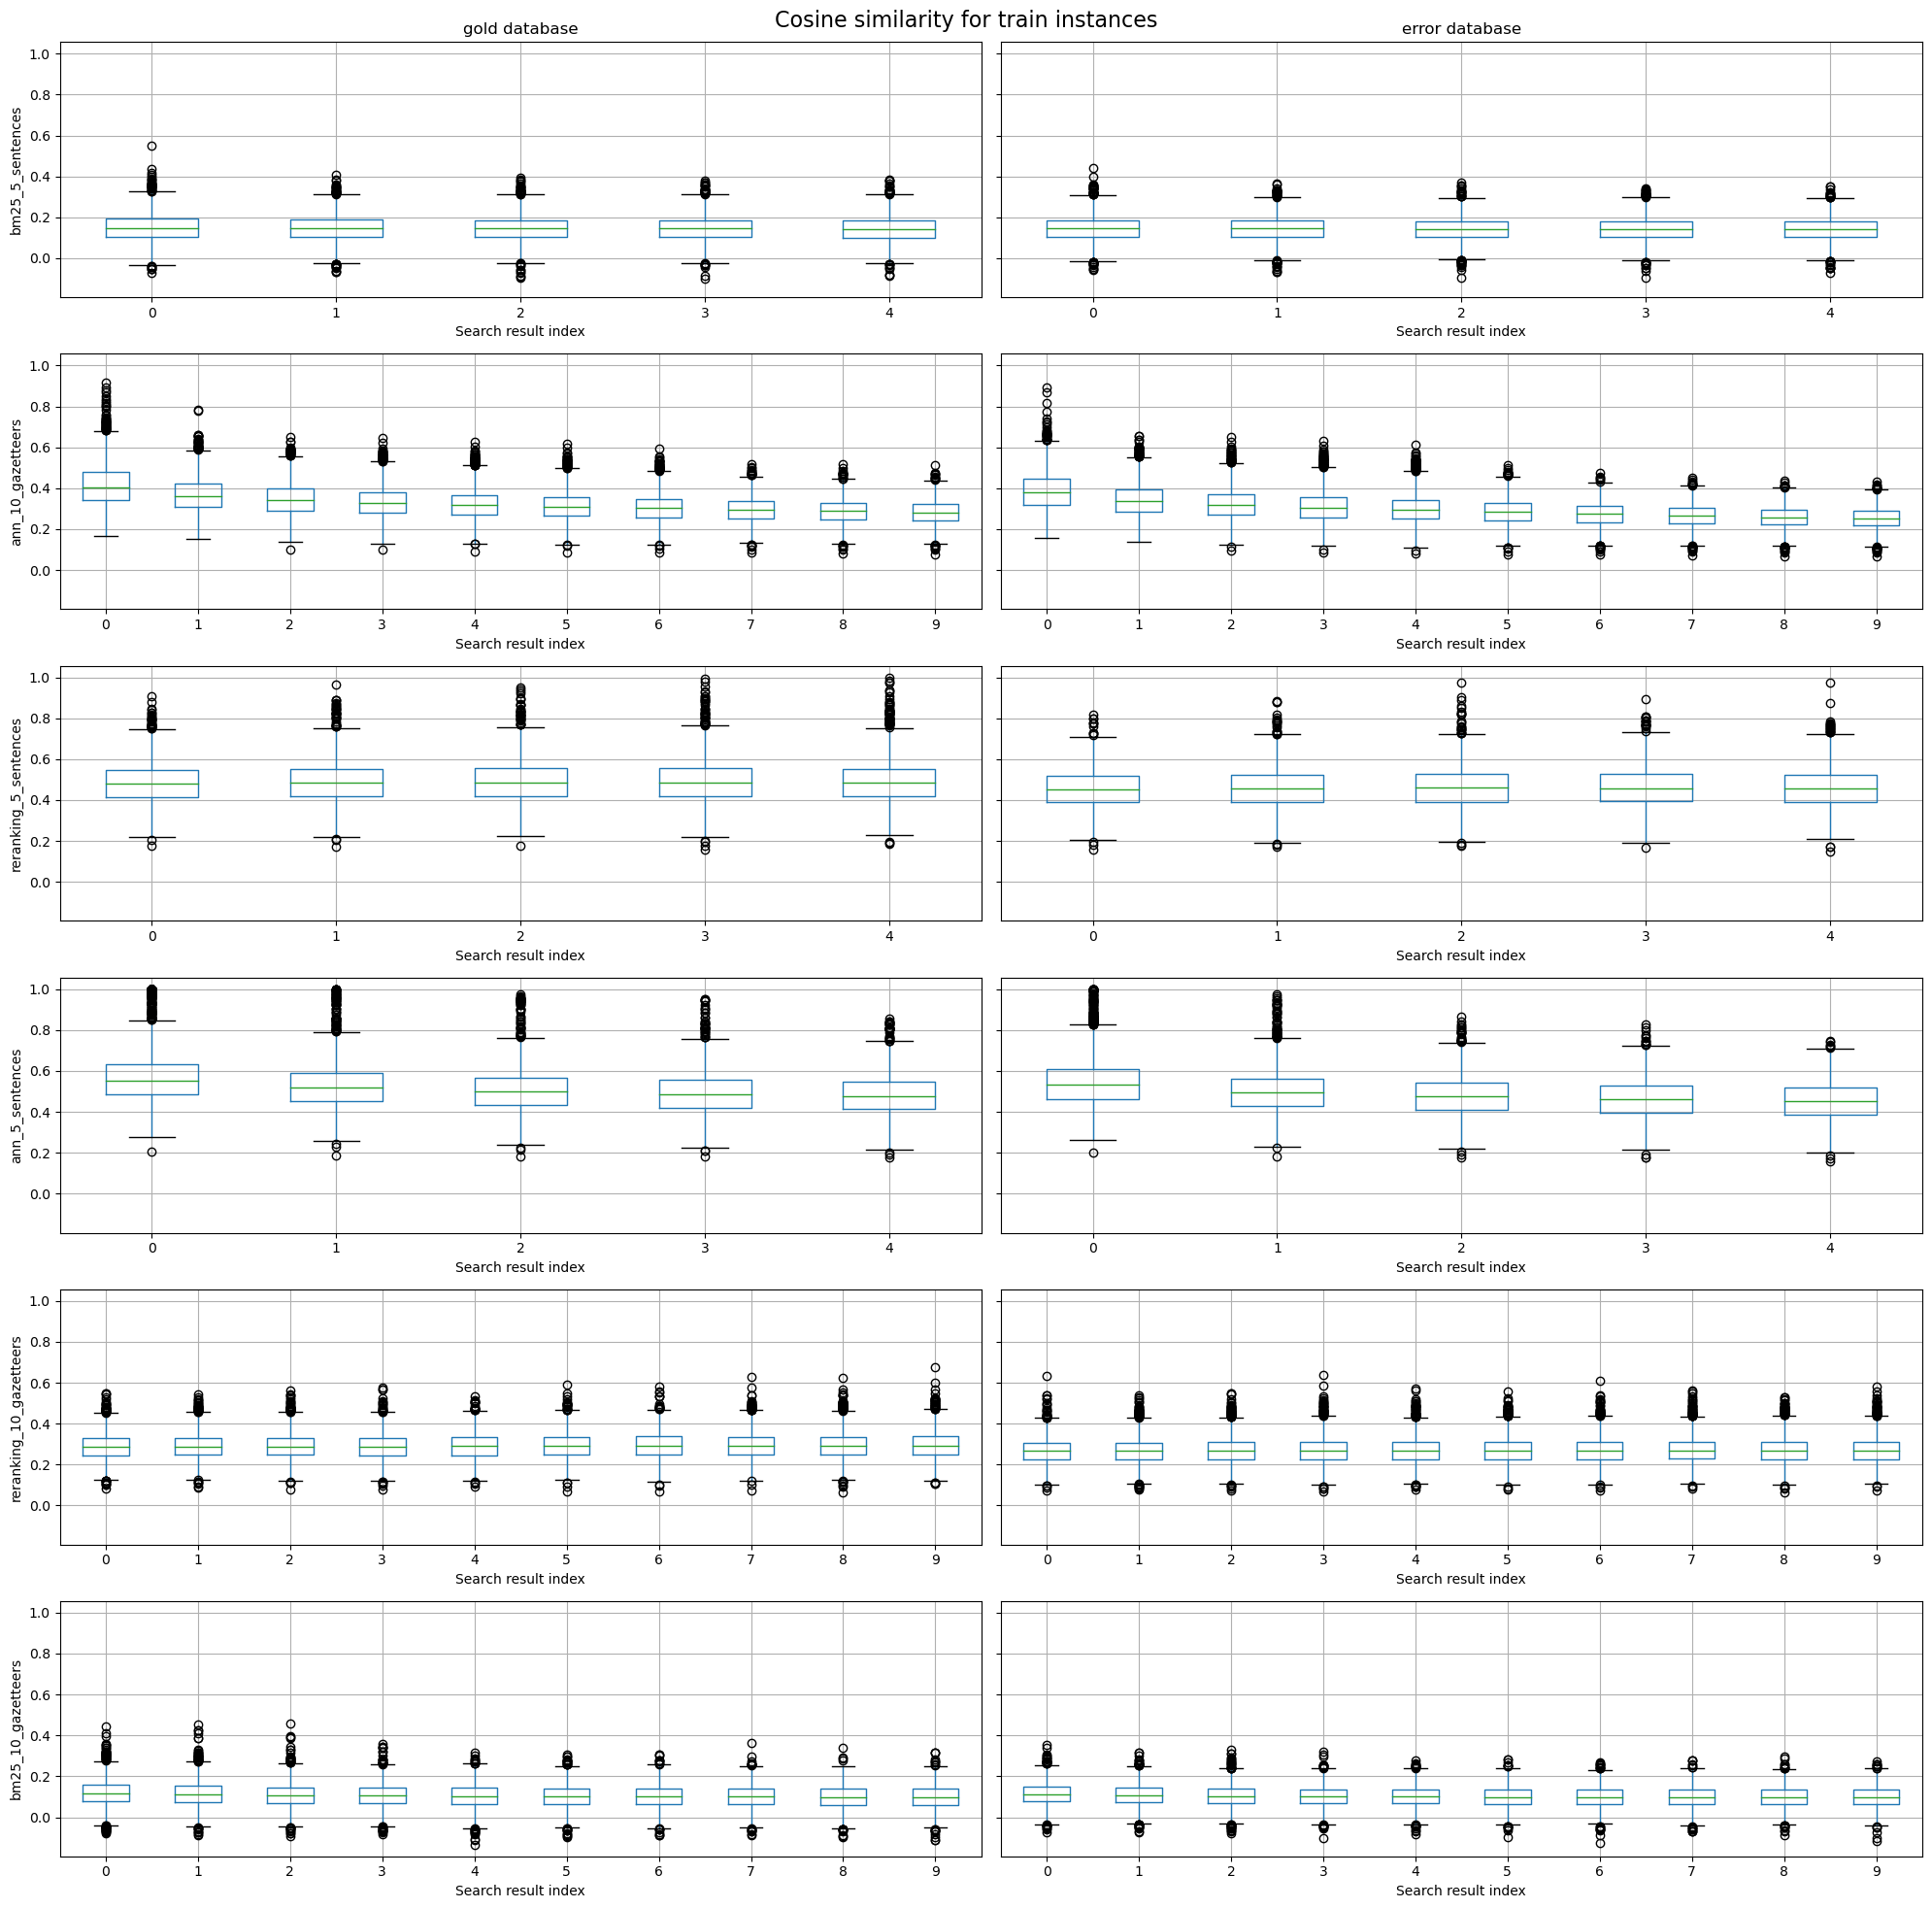

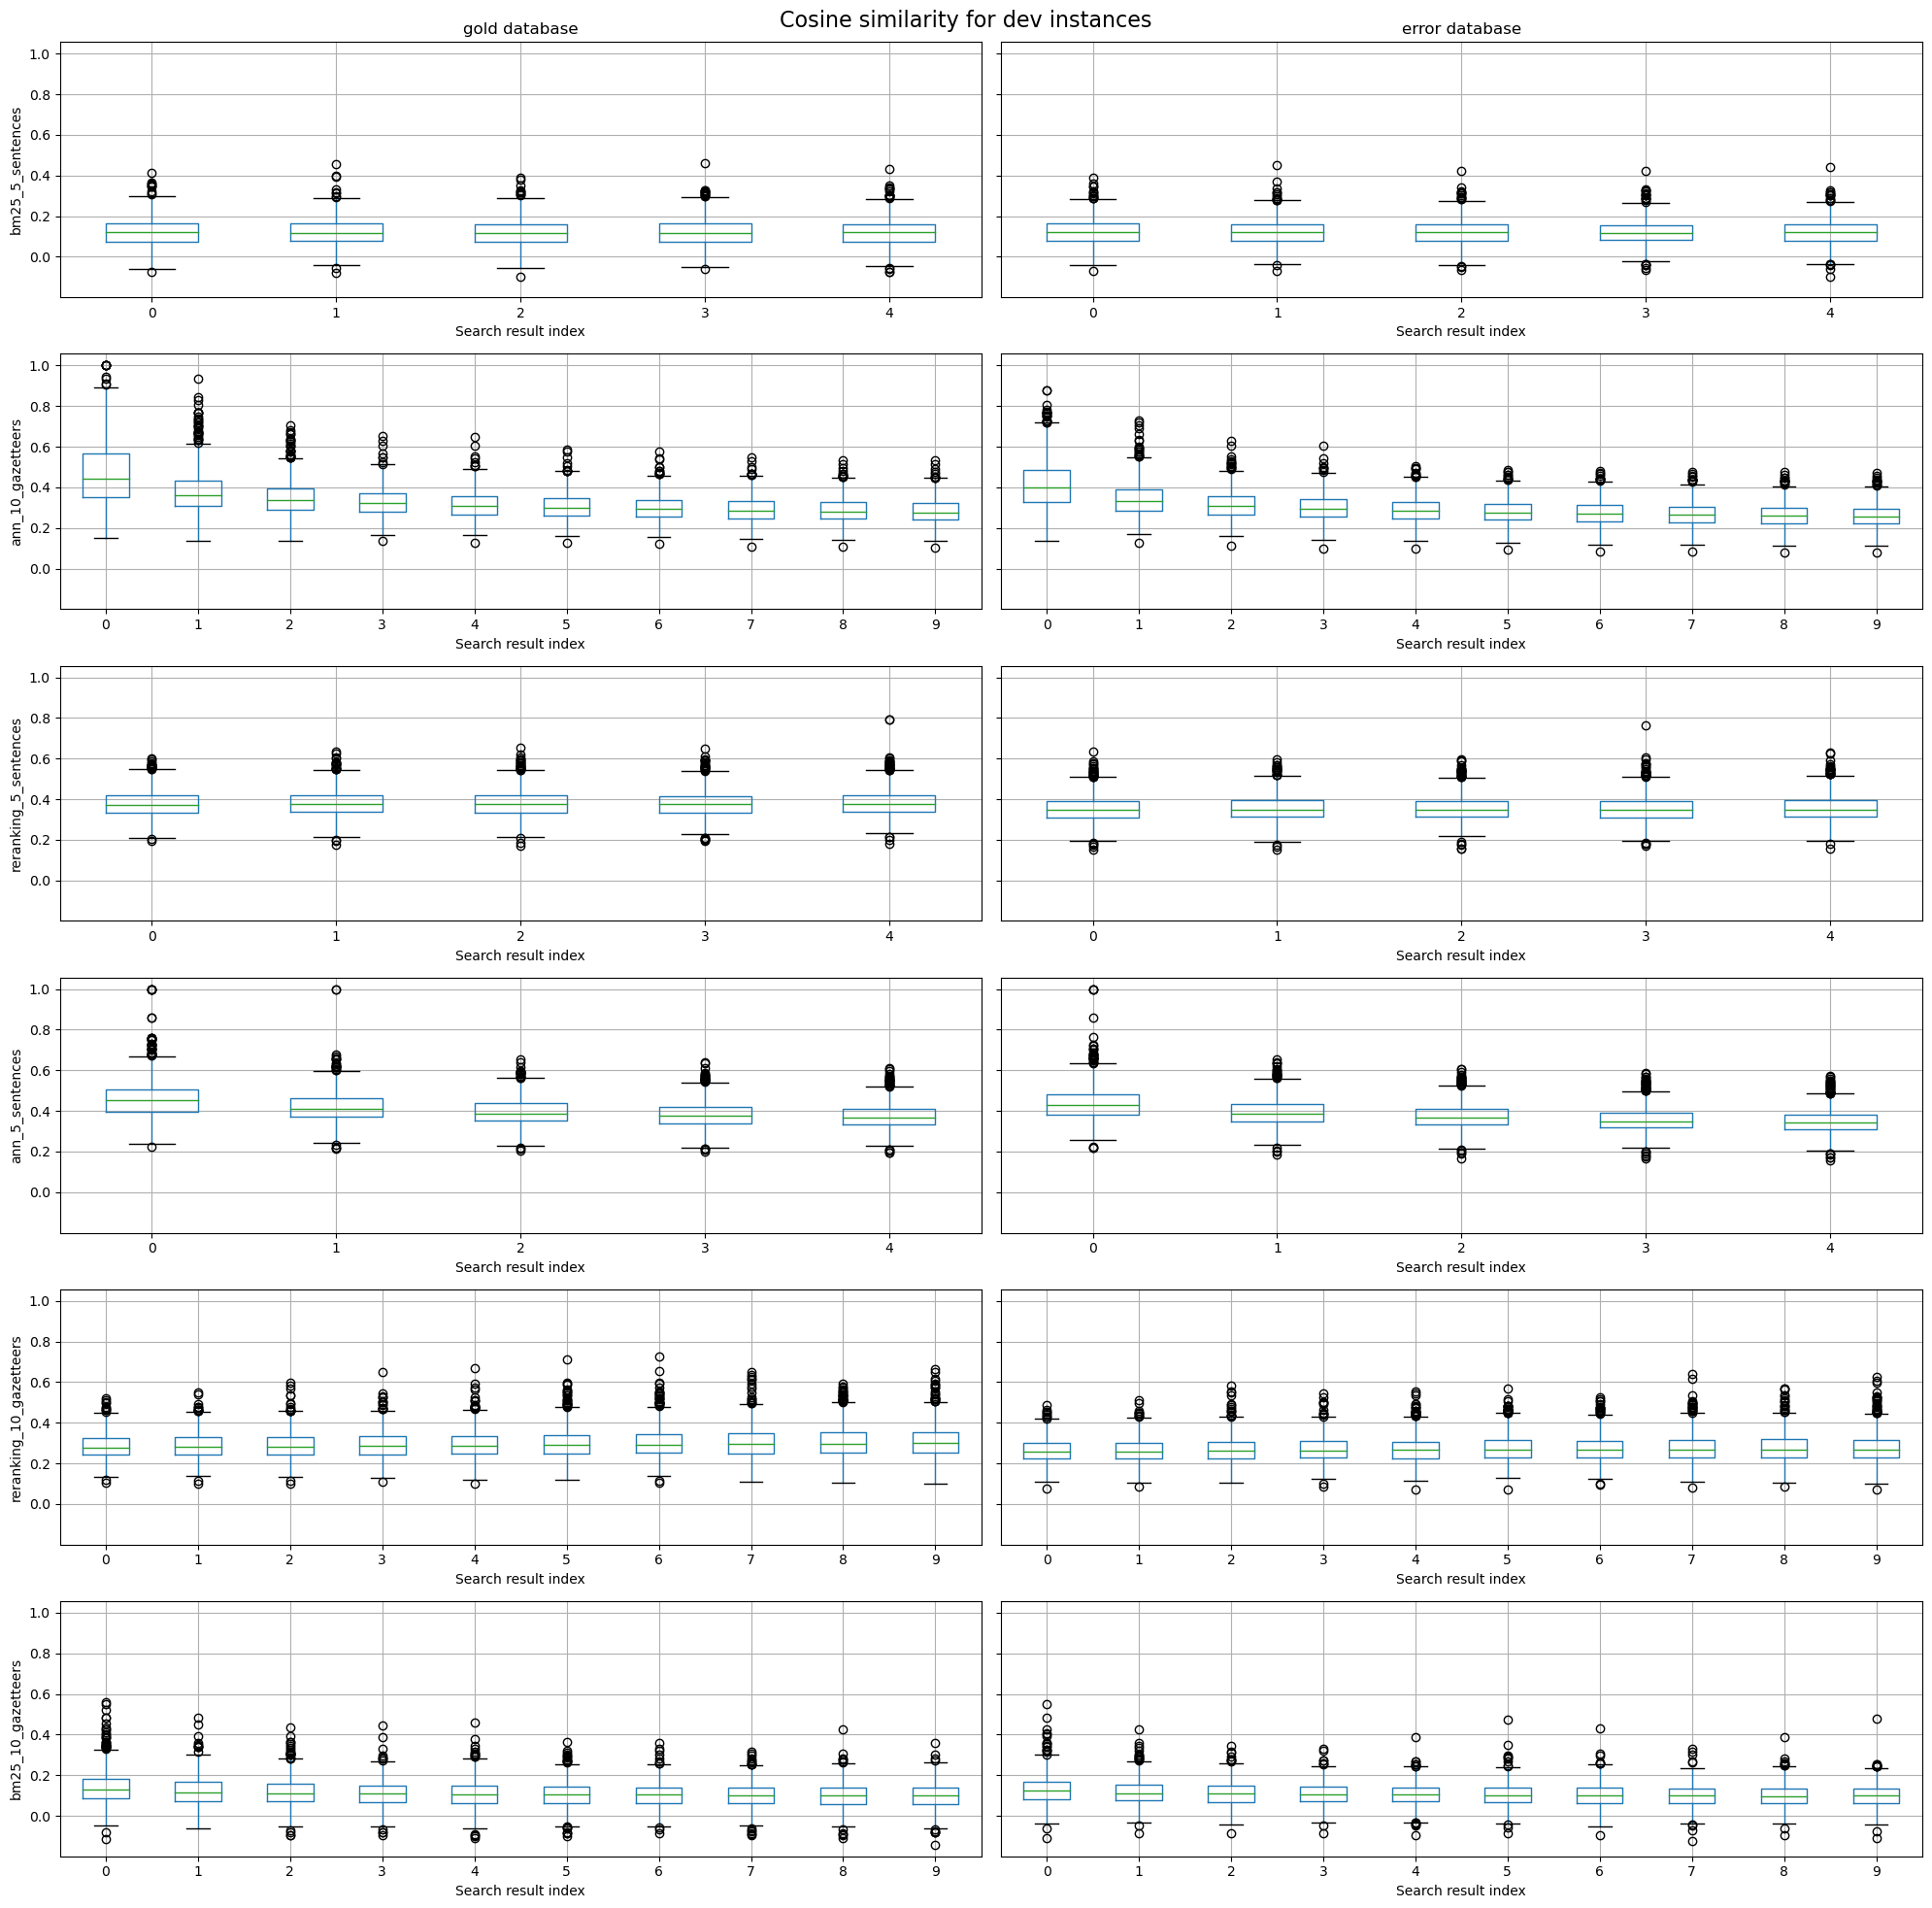

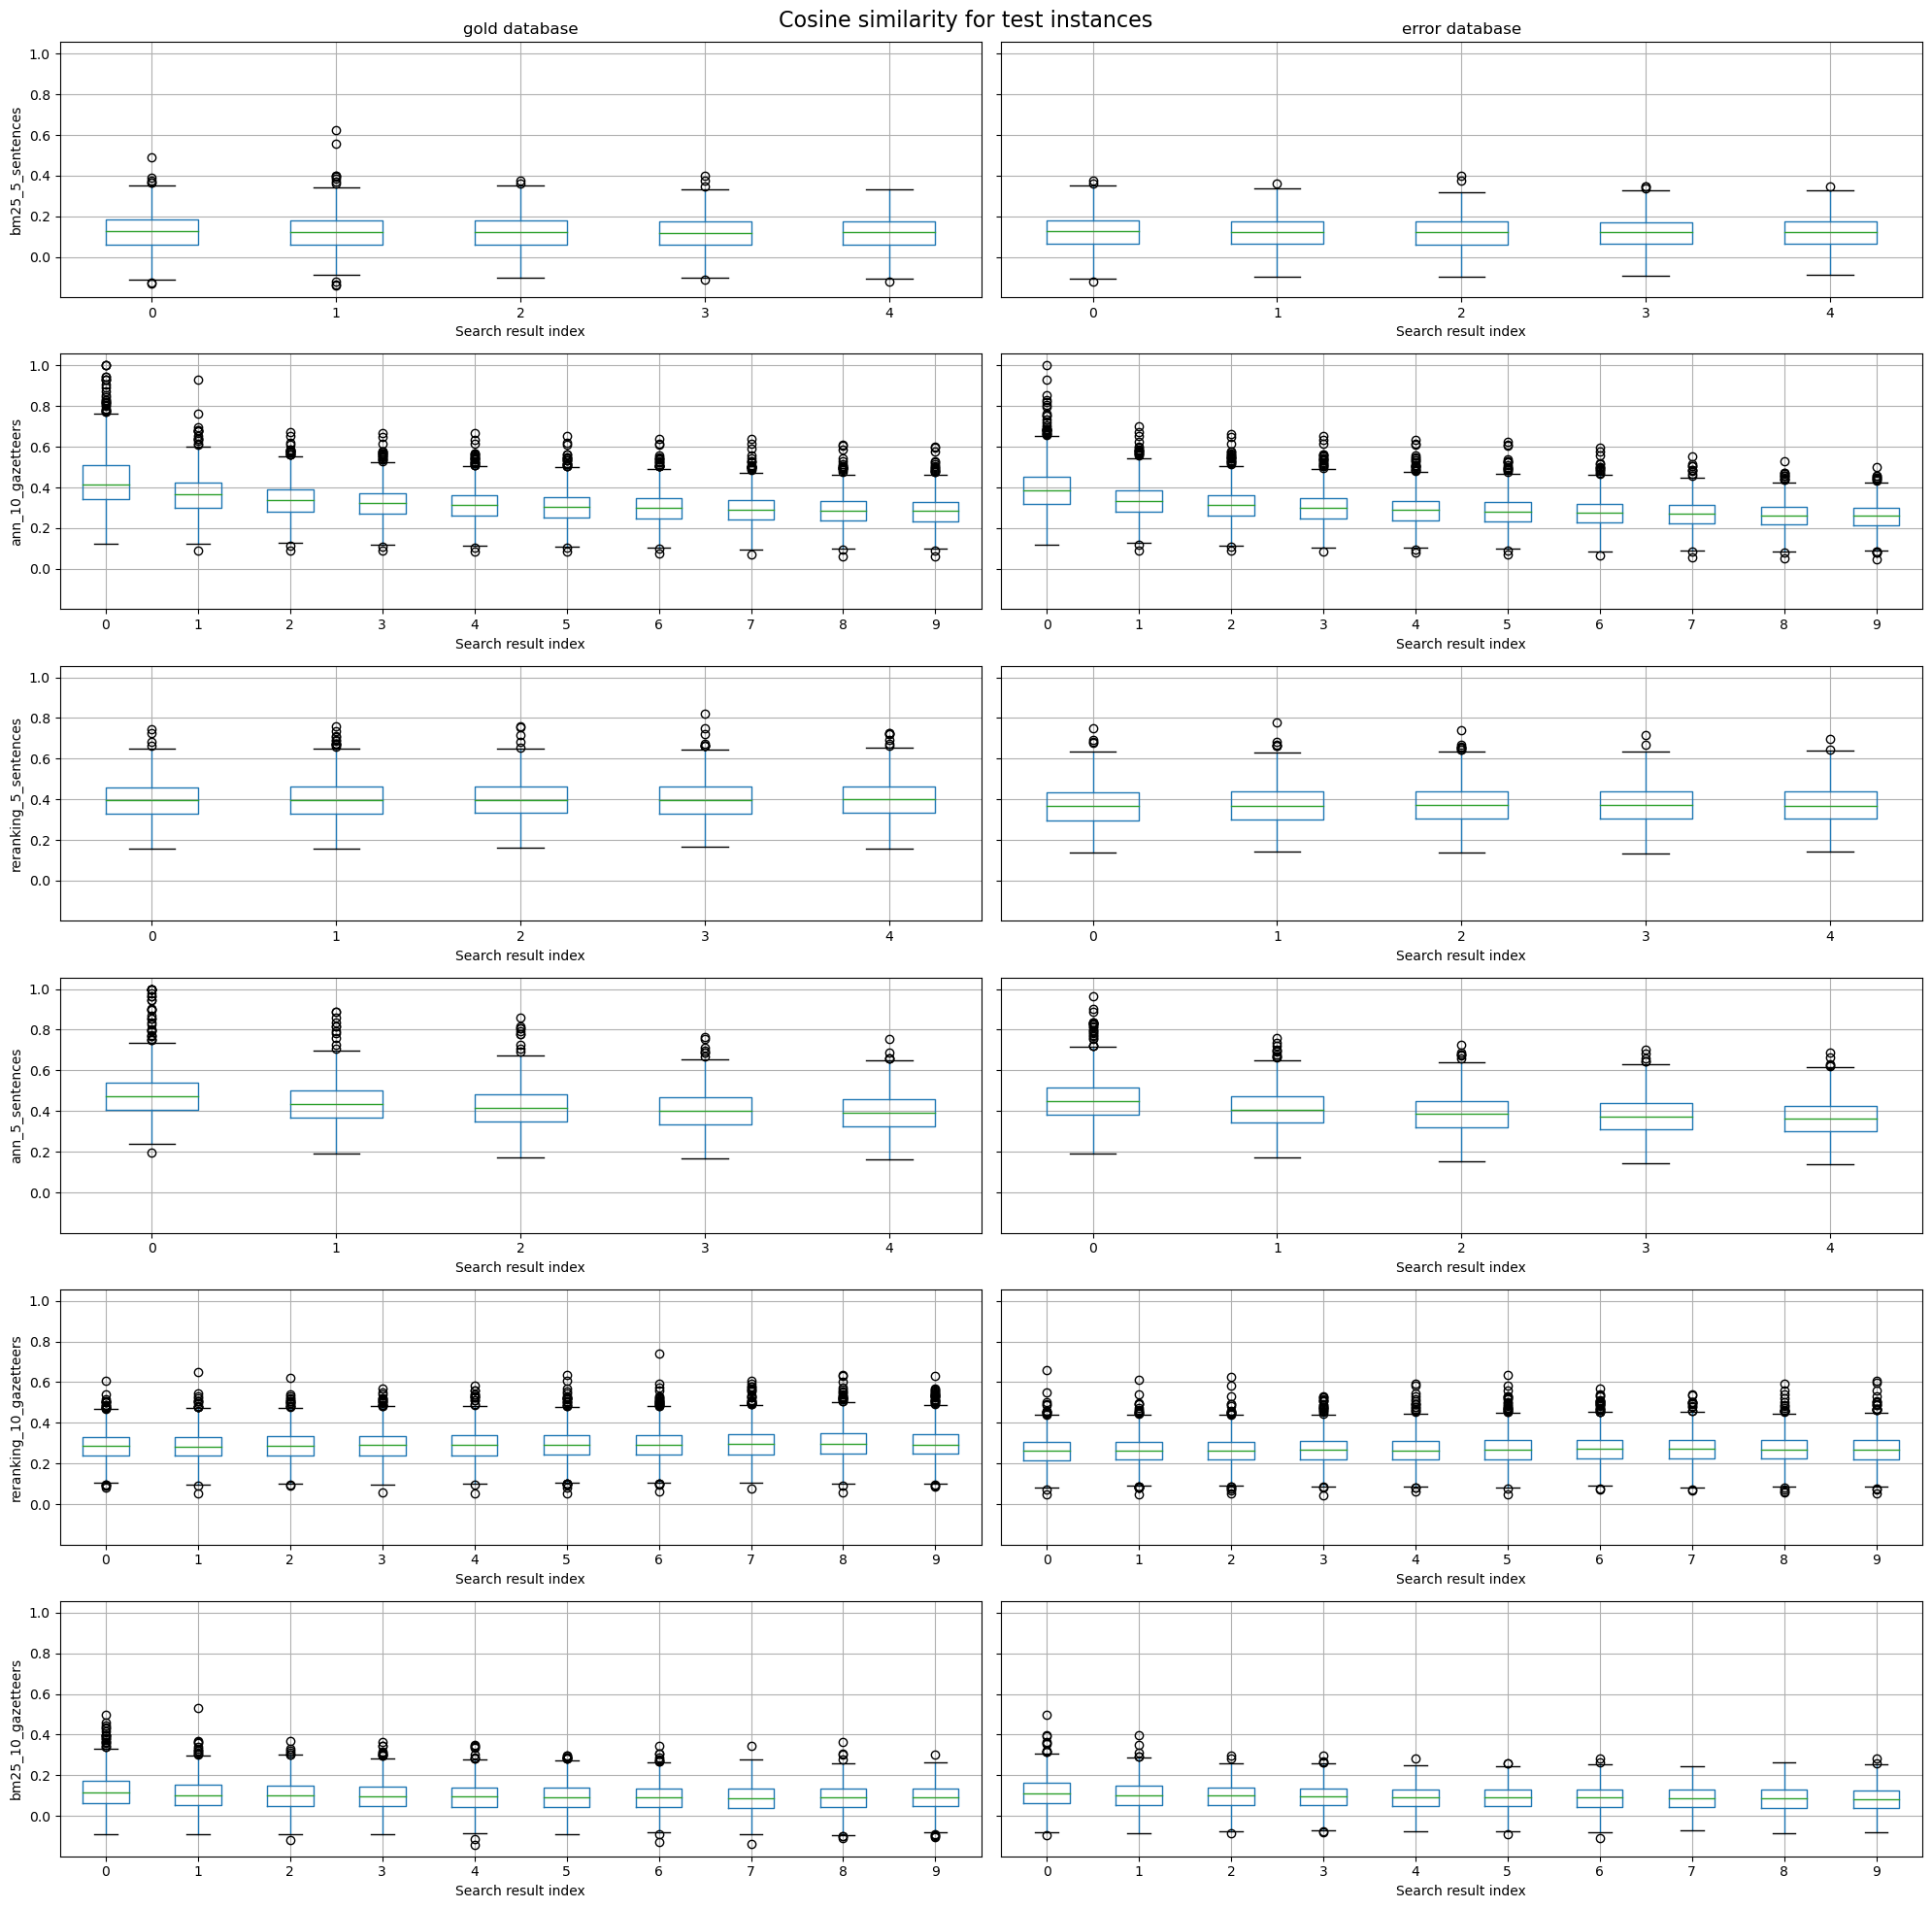

In [9]:
import matplotlib.pyplot as plt
for part in dataset_parts:
    fig, axs = plt.subplots(len(experiments), len(dbs), sharey=True, figsize=(20, 20))
    for row_idx, experiment in enumerate(experiments):
        for column_idx, db in enumerate(dbs):
            sims[(sims["experiment_name"]==experiment) & (sims["db_name"] == db) & (sims["dataset_name"] == part)].boxplot(column=["avg"], by="result_idx", ax=axs[row_idx, column_idx])
            axs[row_idx, column_idx].set_title(None)
            axs[row_idx, column_idx].set_xlabel("Search result index")
            
    for ax, col in zip(axs[0], dbs):
        ax.set_title(col+" database")

    for ax, row in zip(axs[:, 0], experiments):
        ax.set_ylabel(row)

    fig.suptitle(f"Cosine similarity for {part} instances", fontsize=16)
    fig.tight_layout()
    fig.savefig(f"{part}-database-similarities.png")

In [5]:
from itertools import combinations_with_replacement

list(combinations_with_replacement(range(4), 2))

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 2),
 (2, 3),
 (3, 3)]

In [8]:
import torch

device = "cpu"
first = torch.randn(10)
cache = {"b": torch.randn(10)}
cache["a"] = first.cpu()
second = cache["a"].to(device)

first is second

True